## 体重数据的回归和可视化


通过 [Simple Health Export CSV](https://apps.apple.com/cn/app/simple-health-export-csv/id1535380115) 可以导出 iOS 记录的体重秤的数据。
<br><br>
在 2022年中 通过三个月时间减肥超过 30斤 的经历中发挥了很大的作用。

代码很简单，但是激励的效果很好

In [1]:
import datetime as dt
import seaborn as sns
import pandas as pd
from scipy import stats

In [2]:
table = pd.read_csv('./HKQuantityTypeIdentifierBodyMass.csv', skiprows=1)

In [3]:
data = table[['startDate', 'value']].copy()

In [4]:
data

,startDate,value
0,2022-03-11 13:31:34 +0000,83.049995
1,2022-03-11 13:31:34 +0000,83.049995
2,2022-03-12 15:48:34 +0000,81.650002
3,2022-03-12 15:48:34 +0000,81.650002
4,2022-03-12 15:48:50 +0000,81.650002
...,...,...
514,2022-05-28 12:10:35 +0000,68.150002
515,2022-05-29 23:09:12 +0000,69.000000
516,2022-05-29 23:09:12 +0000,69.000000
517,2022-05-29 23:09:18 +0000,69.000000


In [5]:
data.dtypes

startDate     object
value        float64
dtype: object

将时间换算成时间戳

In [6]:
data['startDate'] = pd.to_datetime(data['startDate']).dt.tz_convert(tz='Asia/Shanghai')
data['dt'] = data['startDate'].map(dt.datetime.timestamp)

In [7]:
data

,startDate,value,dt
0,2022-03-11 21:31:34+08:00,83.049995,1.647005e+09
1,2022-03-11 21:31:34+08:00,83.049995,1.647005e+09
2,2022-03-12 23:48:34+08:00,81.650002,1.647100e+09
3,2022-03-12 23:48:34+08:00,81.650002,1.647100e+09
4,2022-03-12 23:48:50+08:00,81.650002,1.647100e+09
...,...,...,...
514,2022-05-28 20:10:35+08:00,68.150002,1.653740e+09
515,2022-05-30 07:09:12+08:00,69.000000,1.653866e+09
516,2022-05-30 07:09:12+08:00,69.000000,1.653866e+09
517,2022-05-30 07:09:18+08:00,69.000000,1.653866e+09


In [8]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data['dt'],data['value'])

In [9]:
# data['delta'] = intercept + slope * data['dt'] - data['value']
# data['abnormal'] = data['delta'].abs() > data['delta'].std() * 1.5

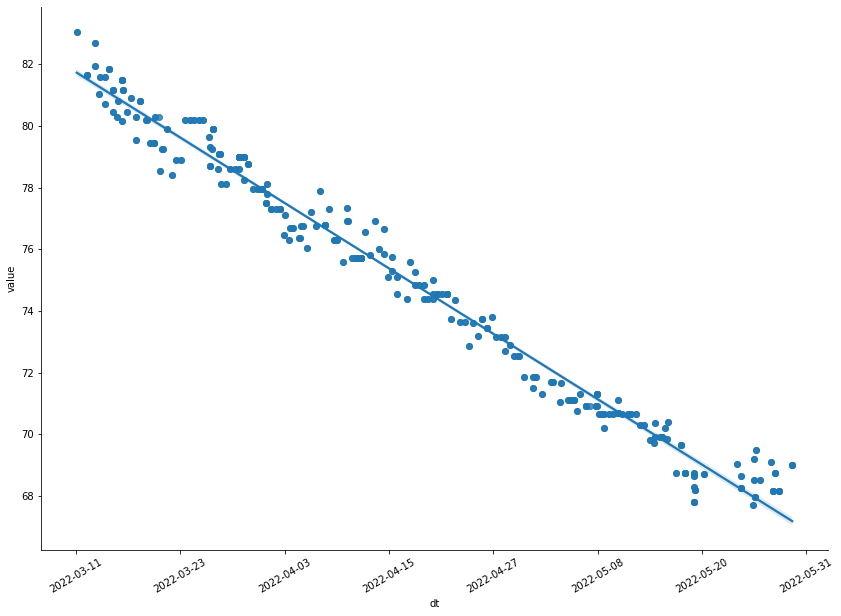

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

p = sns.lmplot(data=data, x='dt', y='value', #hue='abnormal',
               height=8.27, aspect=11.7/8.27, 
    )
ax = plt.gca()
xticks = ax.get_xticks()
ax.xaxis.set_major_locator(mticker.FixedLocator(xticks))
ax.set_xticklabels([
    dt.datetime.fromtimestamp(int(tm)).strftime('%Y-%m-%d') for tm in xticks], rotation=30)
plt.show()

In [11]:
r_value ** 2

0.9805452008968942

和线性模型吻合的非常好

In [12]:
daily = -slope * 3600 * 24
daily

0.1831754849190555


斜率是 0.18kg，相当于每日0.36斤

In [13]:
last_weight = data['value'].iloc[-5:].mean()
last_day = data['dt'].iloc[-5:].mean()

In [14]:
target = 130
duration = (last_weight - target / 2) / daily
dt.date.fromtimestamp(last_day + duration * 3600 * 24)

datetime.date(2022, 6, 19)

对于一个目标，可以算出比较确定的时间

身体确实是一架机器